<a href="https://colab.research.google.com/github/JosselynChila/ProyectoMineriaU3/blob/main/Experimento%203/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Cargar Librerías**

In [ ]:
''' Empezamos importando las librerías que se va a utilizar para el desarrollo del modelo CNN'''

import pandas as pd
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPool1D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Activation
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
import matplotlib.pyplot as plt
import sys

colors= sns.color_palette("mako", 10)


# **Carga de Dataset**

In [ ]:
''' Creamos la función la cual nos permite cargar el Dataset seleccionado mediante un DataFrame '''

data = pd.read_csv("water_potability.csv")
data.head()

# **Caracterización de Dataset**

**ph**: pH de 1. agua (0 a 14).

**Dureza**: Capacidad del agua para precipitar jabón en mg/L.

**Sólidos**: Sólidos disueltos totales en ppm.

**Cloraminas**: Cantidad de Cloraminas en ppm.

**Sulfato**: Cantidad de Sulfatos disueltos en mg/L.

**Conductividad**: Conductividad eléctrica del agua en μS/cm.

**Organic_carbon**: Cantidad de carbono orgánico en ppm.

**Trihalometanos**: Cantidad de Trihalometanos en μg/L.

**Turbidez**: Medida de la propiedad de emisión de luz del agua en NTU.

**Potabilidad**: Indica si el agua es segura para el consumo humano. Potable - 1 y No potable - 0

In [ ]:
''' Mediante la función info() presentamos el resumen completo del conjunto de datos '''

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
''' Mediante el uso de la función shape() enviamos a imprimir el nùmero exactos de datos que existen en el Dataset '''

data.shape

(3276, 10)

In [ ]:
''' Mediante el uso de la función describe() nos rp

data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


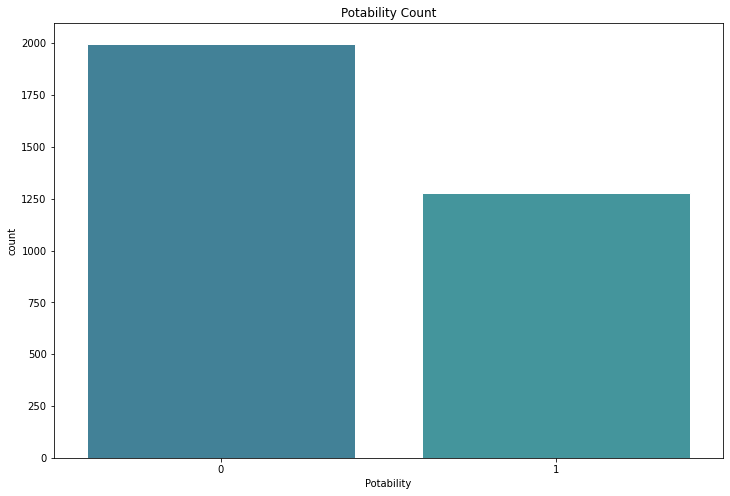

In [ ]:
plt.figure(figsize=(12,8))
plt.title('Potability Count')
sns.set_style('dark')
sns.countplot(data['Potability'], palette=colors[5:7]) 

# **Identificación X y Y**
En el dataset todas nuestras columnas son importantes ya que como se esta buscando la clasificación de la potabilidad del agua con la no potabilidad de la misma es indispensable seleccionar todas estas columnas (ph, dureza, solidos, cloraminas, sulfato, conductividad, Organic_carbon, Trihalometanos, Turbidez) las cuales serán las variables de entrada o X y para la variable objetivo se toma la columna de potabilidad puesto que esta columna contiene el dato de si el agua es segura o no para el consumo humano.

# **Preprocesamiento de datos**

In [ ]:
data.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

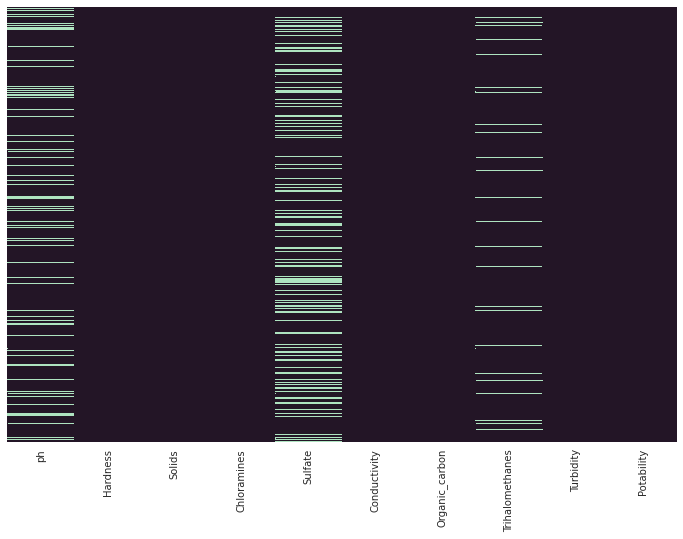

In [ ]:
plt.figure(figsize=(12, 8)) 
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap=colors)

### **Limpiar**

In [ ]:
data = data.dropna()

In [ ]:
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

### **Dividir X, Y**

In [ ]:
X = data.drop('Potability',axis=1).values
y = data['Potability'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=109)

In [ ]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(1407, 9), y=(1407,)
Test: X=(604, 9), y=(604,)


### **Normalizar**

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Experimento**

In [ ]:
early_stopping = EarlyStopping(monitor="val_loss",
                               mode = 'auto',
                               patience=15)

model = keras.Sequential()
model.add(Dense(100, input_shape=(9,), activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(
    optimizer="adam",
    loss='mse',
    metrics=["accuracy"]
)



### **Train**

In [ ]:
history = model.fit(X_train, y_train, epochs = 300, batch_size = 80, validation_data = (X_test, y_test),callbacks=[early_stopping])

Epoch 1/300
18/18 [==============================] - 2s 28ms/step - loss: 0.2439 - accuracy: 0.5558 - val_loss: 0.2361 - val_accuracy: 0.6109
Epoch 2/300
18/18 [==============================] - 0s 9ms/step - loss: 0.2364 - accuracy: 0.6020 - val_loss: 0.2330 - val_accuracy: 0.6093
Epoch 3/300
18/18 [==============================] - 0s 8ms/step - loss: 0.2325 - accuracy: 0.6098 - val_loss: 0.2302 - val_accuracy: 0.6142
Epoch 4/300
18/18 [==============================] - 0s 7ms/step - loss: 0.2288 - accuracy: 0.6205 - val_loss: 0.2267 - val_accuracy: 0.6358
Epoch 5/300
18/18 [==============================] - 0s 9ms/step - loss: 0.2255 - accuracy: 0.6347 - val_loss: 0.2238 - val_accuracy: 0.6540
Epoch 6/300
18/18 [==============================] - 0s 15ms/step - loss: 0.2224 - accuracy: 0.6425 - val_loss: 0.2214 - val_accuracy: 0.6573
Epoch 7/300
18/18 [==============================] - 0s 10ms/step - loss: 0.2191 - accuracy: 0.6489 - val_loss: 0.2184 - val_accuracy: 0.6772
Epoch 8/30

### **Testing**

In [ ]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

### **Métricas del modelo**

In [ ]:
accuracyTrain=model.evaluate(X_train,y_train)
print("\n%s: %.2f%%" % (model.metrics_names[1], accuracyTrain[1]*100))

accuracyTest=model.evaluate(X_test,y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], accuracyTest[1]*100))

44/44 [==============================] - 0s 5ms/step - loss: 0.1799 - accuracy: 0.7306

accuracy: 73.06%
19/19 [==============================] - 0s 3ms/step - loss: 0.1987 - accuracy: 0.7053

accuracy: 70.53%


In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:", metrics.recall_score(y_test, y_pred, average='macro'))

Accuracy: 0.7052980132450332
Precision: 0.6971409574468085
Recall: 0.675523679417122


### **Matriz de Confusion**

Text(0.5, 15.0, 'Predicted label')

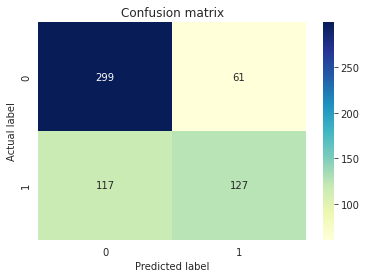

In [ ]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

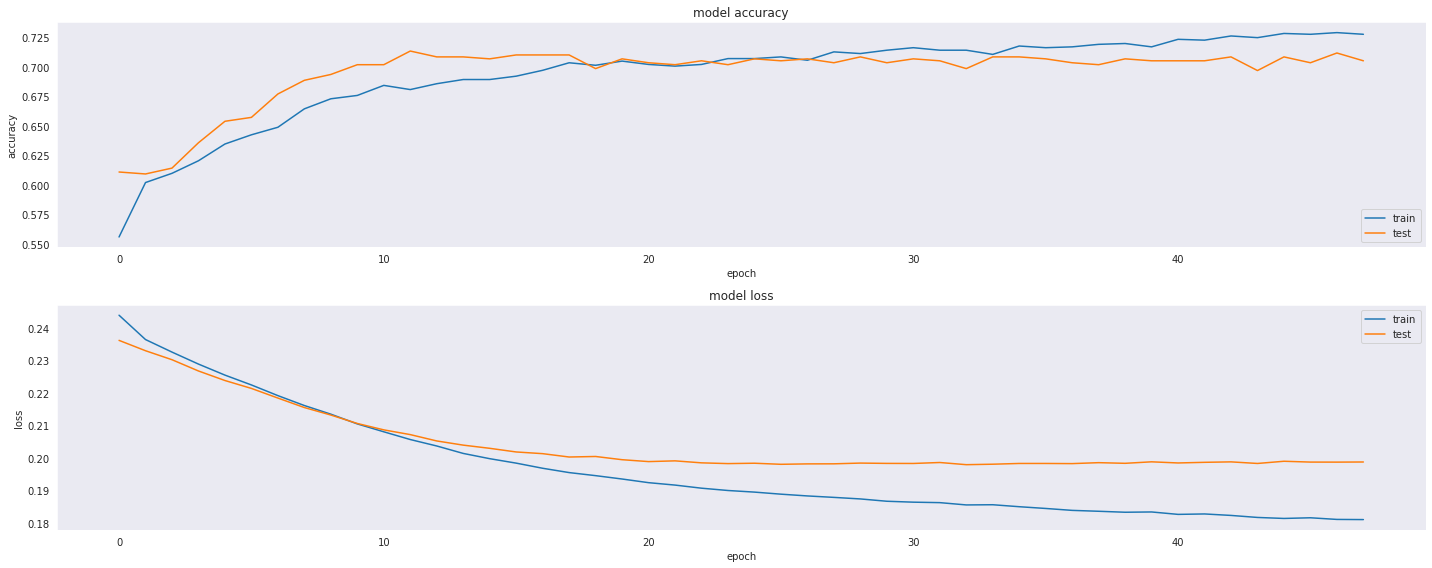

In [ ]:
plt.figure(figsize=[20,8])

plt.subplot(2,1,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()